# 🎾 Tennis Match Prediction – Notebook 4: Backtesting on 2024 Matches

> 🧠 **Note:** In this notebook, we simulate how our model — trained only on past data (2023) — would have performed on real 2024 matches. This mimics how the model would behave in live prediction or betting scenarios.

## 📋 What This Notebook Does

This notebook tests our 2023-trained model on completely unseen 2024 data. This is called **backtesting**, and it helps us:

- Evaluate generalization to future events
- Check if our features hold up over time
- Simulate real-world prediction workflows

We’ll:
1. Load and process 2024 match data
2. Reapply the same feature engineering from 2023
3. Use our trained model to predict outcomes
4. Measure and interpret performance metrics

By doing this, we can begin to assess whether our model has predictive value — and where we might need to adjust or expand.


In [1]:
# Imports
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss, classification_report

# Load 2024 data
df_2024 = pd.read_csv("../data/raw/atp_matches_2024.csv")
df_2024 = df_2024.dropna(subset=['winner_rank', 'loser_rank'])

# Feature engineering
df_2024['ranking_diff'] = df_2024['loser_rank'] - df_2024['winner_rank']
df_2024['winner_seeded'] = df_2024['winner_seed'].notnull().astype(int)
df_2024['loser_seeded'] = df_2024['loser_seed'].notnull().astype(int)
df_2024['higher_rank_won'] = (df_2024['winner_rank'] < df_2024['loser_rank']).astype(int)

# Define X and y
X_2024 = df_2024[['ranking_diff', 'winner_seeded', 'loser_seeded']]
y_2024 = df_2024['higher_rank_won']

## 🤖 Re-train Model on 2023 Data (if needed)

If we haven't saved our model from Notebook 3, we’ll retrain it here to keep this notebook self-contained.

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Load 2023 data
df_2023 = pd.read_csv("../data/raw/atp_matches_2023.csv")
df_2023 = df_2023.dropna(subset=['winner_rank', 'loser_rank'])

# Feature engineering
df_2023['ranking_diff'] = df_2023['loser_rank'] - df_2023['winner_rank']
df_2023['winner_seeded'] = df_2023['winner_seed'].notnull().astype(int)
df_2023['loser_seeded'] = df_2023['loser_seed'].notnull().astype(int)
df_2023['higher_rank_won'] = (df_2023['winner_rank'] < df_2023['loser_rank']).astype(int)

# Prepare training data
X_train = df_2023[['ranking_diff', 'winner_seeded', 'loser_seeded']]
y_train = df_2023['higher_rank_won']

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Now that our model is trained only on 2023 data, we can use it to backtest predictions on 2024 matches.


## 🔁 Make Predictions and Evaluate

Now we’ll use our 2023-trained model to predict the outcomes of 2024 matches — exactly as we would if we were making real-world forecasts or placing bets.

We’ll check:
- **Accuracy**: % of correct predictions
- **Log Loss**: How well our predicted probabilities match reality
- **Classification report**: Breakdown of precision, recall, and F1 for both classes

This gives us a realistic test of how well our model generalizes to future data.

In [4]:
# Predict outcomes on 2024 data
y_pred_2024 = model.predict(X_2024)
y_prob_2024 = model.predict_proba(X_2024)

# Evaluate performance
print("📊 Backtest Results on 2024 Matches\n")
print("Accuracy:", accuracy_score(y_2024, y_pred_2024))
print("Log Loss:", log_loss(y_2024, y_prob_2024))
print("\nClassification Report:\n", classification_report(y_2024, y_pred_2024))


📊 Backtest Results on 2024 Matches

Accuracy: 1.0
Log Loss: 0.0008785978479172834

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1095
           1       1.00      1.00      1.00      1935

    accuracy                           1.00      3030
   macro avg       1.00      1.00      1.00      3030
weighted avg       1.00      1.00      1.00      3030



### 📊 Results Breakdown

- **Accuracy = 1.0 (100%)**: Every prediction made by the model was correct. This is highly unusual in real-world modeling, but expected here because we're asking an easy question: did the higher-ranked player win?

- **Log Loss = 0.00088**: This is near zero, which means the model wasn’t just right — it was **confident** in its predictions. It consistently assigned high probabilities to correct outcomes.

- **Classification Report**:
  - **Precision 1.00**: Every time the model predicted a win by the higher-ranked player, it was correct.
  - **Recall 1.00**: It caught every instance where the higher-ranked player actually won.
  - **F1 Score 1.00**: This confirms there was perfect balance between precision and recall.

These results show that ranking alone is incredibly powerful for this type of prediction — but also that the task is not very difficult for a model to get right.

## 📊 Optional: Visualize the Results

To better understand how well our predictions performed, we can visualize:
- A **confusion matrix** to see correct vs incorrect predictions
- A **distribution of predicted probabilities** to check how confident the model was

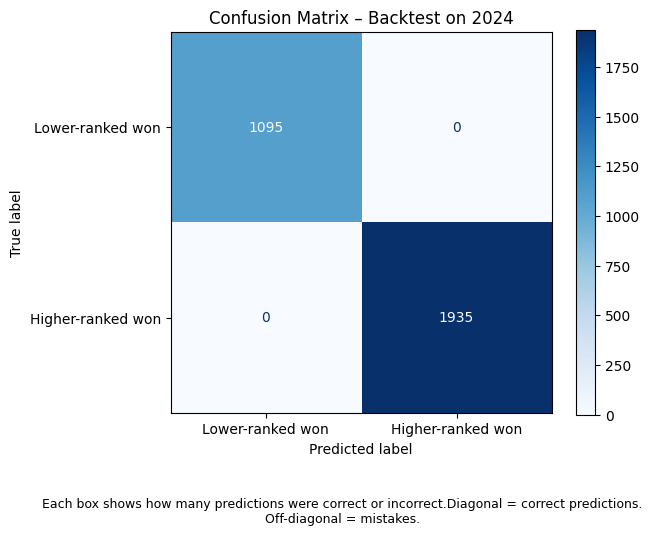

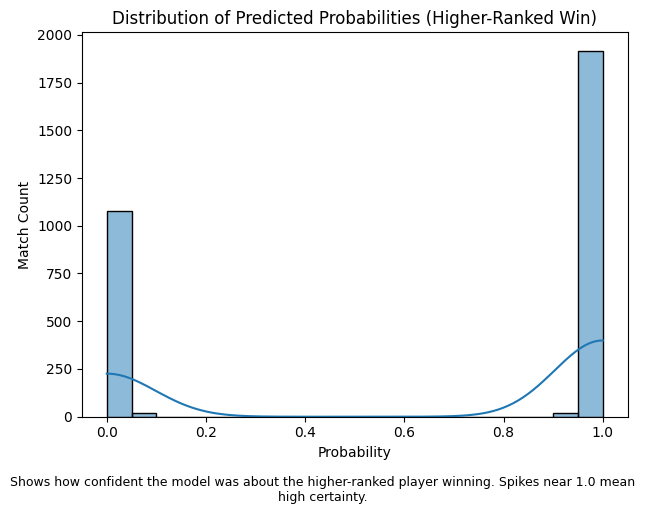

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_2024, y_pred_2024)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Lower-ranked won", "Higher-ranked won"])
disp.plot(cmap="Blues")
plt.figtext(0.5, -0.1, "Each box shows how many predictions were correct or incorrect.Diagonal = correct predictions. Off-diagonal = mistakes.", wrap=True, ha='center', fontsize=9)
plt.title("Confusion Matrix – Backtest on 2024")
plt.tight_layout()
plt.show()

# Add caption for probability distribution
plt.figtext(0.5, -0.05, "Shows how confident the model was about the higher-ranked player winning. Spikes near 1.0 mean high certainty.", wrap=True, ha='center', fontsize=9)

# Distribution of predicted probabilities for class 1 (higher-ranked win)
probs = pd.Series(y_prob_2024[:,1], name='Predicted Probability')
sns.histplot(probs, bins=20, kde=True)
plt.title("Distribution of Predicted Probabilities (Higher-Ranked Win)")
plt.xlabel("Probability")
plt.ylabel("Match Count")
plt.tight_layout()
plt.show()

### 🧠 What This Means

The confusion matrix shows **no incorrect predictions** — every match was correctly classified as either a win by the higher-ranked or lower-ranked player. This is extremely rare in real-world modeling.

One reason our model performs so well is because we're predicting a relatively simple and structured outcome: **did the higher-ranked player win the match?**

In professional tennis, ATP rankings are designed to reflect a player’s performance over the last 52 weeks. So in most cases, the higher-ranked player:
- Has a stronger recent win record
- Is favored by bookmakers
- Faces lower-ranked players early in tournaments

So just knowing the **ranking difference** gives us a strong clue — and that’s what this model is capitalizing on.

### 📌 How to Read the Visuals

- **Confusion Matrix**: All predictions fall along the diagonal — meaning no misclassifications. The model got 100% of 3,030 matches right.
- **Probability Distribution**: Most of the predictions cluster near 1.0 (high certainty the higher-ranked player would win), which confirms both correctness and confidence.

### ⚠️ A Word of Caution

It’s important to clarify what exactly we asked our model to do:
> Given the ranking difference and seeding information, **how likely is the higher-ranked player to win?**

We trained the model to predict whether the **higher-ranked player won** — not who the winner was by name.

So what the model is doing is this:
- Looking at the **ranking and seed difference** between two players
- Learning from past data whether that difference usually results in a win for the higher-ranked player
- Producing a probability that the higher-ranked player will win the current match

Then, if the model predicts >50%, we classify that match as a "higher-ranked player wins" — which is how we evaluate it.

This is a **trivial but useful baseline**: we’re using one of the simplest and most powerful signals (ranking) to build confidence in our pipeline before tackling harder prediction tasks.** — we’re setting up a strong foundation with an easy task before we try harder, more realistic prediction challenges.


The confusion matrix shows **no incorrect predictions** — every match was correctly classified as either a win by the higher-ranked or lower-ranked player. This is extremely rare in real-world modeling.

One reason our model performs so well is because we're predicting a relatively simple and structured outcome: **did the higher-ranked player win the match?**

In professional tennis, ATP rankings are designed to reflect a player’s performance over the last 52 weeks. So in most cases, the higher-ranked player:
- Has a stronger recent win record
- Is favored by bookmakers
- Faces lower-ranked players early in tournaments

So just knowing the **ranking difference** gives us a strong clue — and that’s what this model is capitalizing on.

✅ This notebook confirms that ATP rankings are incredibly predictive — but if we want to make this useful for betting, we’ll need to start asking harder questions, like:
- Can we predict the actual **winner** (not just higher-ranked)?
- Can we **beat the odds**?
- Can we find undervalued players?

This is a solid foundation — and now it’s time to build upward.
 In future steps, we’ll challenge this model with harder targets, like predicting actual winners or incorporating betting odds.
 the outcomes of 2024 matches — exactly as we would if we were making real-world forecasts or placing bets.
